Enter file name: students_data.csv




					 Welcome to US high school student records. 	


Choose from the following options[1-5]:

 1-Retrieve the sex, age, number of relative in a family, state, and race based on the ID.
 2-Retrieve the sex, school support, access internet, attendance rate, and parental involvement associated with a specific race.
 3-Retrieve the ID, free time, math score, reading score and writing score of students whose absences are less than 50 based on the parental involvement. 
 4-Retrieve traveltime,studytime and failure of students who got school support, associated with guardian 
 5-More 



Enter your option: 5


Choose from the following options[1-5]:

 1- Identify the top 3 levels of mother’s education for a specific race of students based on the parental involvement levels. 
 2- Analyse the average number of absences among students with a particular level of parental involvement. 
 3- Analyse the average math score of students with an attendance rate greater than 80%, based on race. 
 4- Analyse customised data. 
 5- More. 



Enter your option[1-5]: 5


Choose from the following options[1-5]:

 1- Create a chart to illustrate the proportion of students in this school based on their race. 
 2- Create a chart to visually compare the average writing scores among students in each race group. 
 3- Create a chart to illustrate the relationship between students' reading and writing scores. 
 4- Customised selection. 
 5- Exit Program. 



Enter your option[1-5]: 3


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


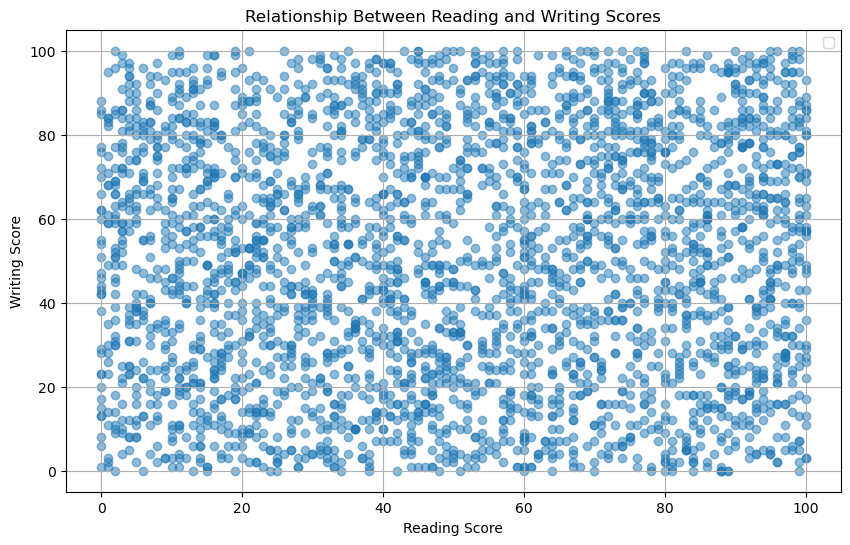

None


In [54]:
import csv
import tasks
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
#meaningful variables 


def b1(students_df,race2):
    #students_df['Mother_education_level']=int(students_df['Mother_education_level'])
    race_filtered_data = students_df[students_df['Race'] == race2]
    top_education = race_filtered_data.groupby(['Parental_involvement']).size().reset_index(name='Count')
    top_education = top_education.sort_values(by='Count', ascending=False).head(3)
    return top_education

def b2(students_df, parental_involvement):
    if parental_involvement=="high" or parental_involvement=="low" or parental_involvement=="medium":
        parental_involvement_data = students_df[students_df['Parental_involvement'] == parental_involvement]
        avg_absences = parental_involvement_data['Absences'].mean()
        print(f"Average for {parental_involvement} parental involvement is:")
        return avg_absences
    else:
        return("Enter correct involvement.")

def b3(students_df,min_attendance):
        attendance_data = students_df[students_df['Attendance_rate'] > min_attendance]
        avg_mathscores = attendance_data.groupby('Race')['Math_score'].mean()
        return avg_mathscores

def b4(students_df):
    internet_access_data = students_df[students_df['Access_internet'] == 'yes']
    average_reading_scores = internet_access_data.groupby('Sex')['Writing_score'].mean()
    return average_reading_scores

def c1(students_df):
    race_counts = students_df['Race'].value_counts()
    plt.figure()
    plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title('Proportion of Students Based on Race')
    plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
    plt.legend(loc='center',bbox_to_anchor=(1.3,1))
    plt.show()

def c2(students_df):
    avg_writing_scores = students_df.groupby('Race')['Writing_score'].mean()
    plt.figure(figsize=(6, 4))
    avg_writing_scores.plot(kind='bar', color='blue')
    plt.title('Average Writing Scores by Race')
    plt.xlabel('Race')
    plt.ylabel('Average Writing Score')
    plt.xticks(rotation=0)
    plt.show()

def c3(students_df):
    plt.figure(figsize=(10, 6))
    plt.scatter(students_df['Reading_score'], students_df['Writing_score'], alpha=0.5)
    plt.title('Relationship Between Reading and Writing Scores')
    plt.xlabel('Reading Score')
    plt.ylabel('Writing Score')
    plt.grid(True)
    plt.show()

#Main Program

filename=input("Enter file name:")
try:
    with open(filename,'r',encoding='UTF-8') as csv_file:
        csv_reader=csv.reader(csv_file)
        heading=next(csv_reader)
        #print("\n\n\t\t\t\t\t Welcome to US high school student records. \t\n")
        #print("\nChoose from the following options[1-5]:\n\n 1-Retrieve the sex, age, number of relative in a family, state, and race based on the ID.\n 2-Retrieve the sex, school support, access internet, attendance rate, and parental involvement associated with a specific race.\n 3-Retrieve the ID, free time, math score, reading score and writing score of students whose absences are less than 50 based on the parental involvement. \n 4-Retrieve traveltime,studytime and failure of students who got school support, associated with guardian. \n 5-More. \n ")
        tasks.welcome()
        option=input("Enter your option:")
        if option == "1":
            id=input("Enter ID (ID-xxxx):")
            tasks.a1(csv_reader,id)
            #print(a1(csv_reader,id))
        elif option =="2":
            race=input("Enter Race (Asian/Hispanic/African American/White/Other):")
            tasks.a2(csv_reader,race)
            #print(a2(csv_reader,race))
        elif option =="3":
            involvement=input("Enter parental involvement (high/medium/low):")
            tasks.a3(csv_reader,involvement)
            #print(a3(csv_reader,involvement))
        elif option =="4":             # retrieve traveltime,studytime and failure of students who got school support, associated with guardian
            guardian=input("Enter guardian (father/mother/other):")
            tasks.a4(csv_reader,guardian)
            #print(a4(csv_reader,guardian))
        elif option =="5":
            students_df=pd.read_csv(filename,header=0,encoding='utf-8')
            print("Choose from the following options[1-5]:\n\n 1- Identify the top 3 levels of mother’s education for a specific race of students based on the parental involvement levels. \n 2- Analyse the average number of absences among students with a particular level of parental involvement. \n 3- Analyse the average math score of students with an attendance rate greater than 80%, based on race. \n 4- Analyse customised data. \n 5- More. \n")
            option2=input("Enter your option[1-5]:")
            if option2=="1":
                race2=input("Enter race(Asian/Hispanic/African American/White/Other): ")
                print(b1(students_df,race2))
            elif option2=="2":
                parent_envolvement2=input("Enter level of parental involvement(high/medium/low):")
                #tasks.b2(students_df,parent_envolvement2)
                print(b2(students_df,parent_envolvement2))
            elif option2=="3":
                min_attendance=80
                print(b3(students_df,min_attendance))
            elif option2=="4":
                print(b4(students_df))
            elif option2=="5":
                print("Choose from the following options[1-5]:\n\n 1- Create a chart to illustrate the proportion of students in this school based on their race. \n 2- Create a chart to visually compare the average writing scores among students in each race group. \n 3- Create a chart to illustrate the relationship between students' reading and writing scores. \n 4- Customised selection. \n 5- Exit Program. \n")
                option3=input("Enter your option[1-5]:")
                if option3=="1":
                    print(c1(students_df))
                if option3=="2":
                    print(c2(students_df))
                if option3=="3":
                    print(c3(students_df))
        else:
            print("Enter correct option number.")
except FileNotFoundError as e:
    print(f"File doesnot exist:{e}")